## Сорокин Вадим, 828

# Лабораторная работа 4.2


Исследование энергетического спектра 𝛽-частиц и определение их максимальной энергии при помощи магнитного спектрометра.

In [121]:
import numpy as np
import scipy as sp
import scipy.optimize
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy.interpolate import UnivariateSpline
import scipy.optimize 
from scipy.optimize import fsolve
from IPython.display import Image
import statsmodels.api as sm


### Цель работы:
Исследование энергетического спектра 𝛽-частиц и определение их максимальной энергии при помощи магнитного спектрометра.

### Теоретическая справка:

Бета-распад это самопроизвольное преваращение ядер, при котором их массовове число не изменяется, а заряд изменяется на единицу. В данной работе мы будем иметь дело с электронным распадом:

\begin{equation}
		    _{Z}^{A}X \rightarrow _{Z+1}^{A}X + e^{-} + \widetilde{\nu}
\end{equation}
        
Освобождающаяся в результате распада энергия делится между исходным ядром, электроном и нейтрино. При этом доля энергии, уносимая ядром крайне мала, так что вся энергия делится между нейтрино и электроном. Поэтому электроны могут иметь любую энергию от нулевой до некоторой макимальной энергии, высвобождаемой при распаде.
		
Вероятность $d\omega$ того, что электрон вылетит с имульсом $d^3p$, а нейтрино с импульсом $d^3k$ равна произведению этих дифференциалов, но мы должны учесть также закон сохранения энергии.

\begin{equation}
		    E_e - E - ck = 0
\end{equation}

Энергия электрона связана с импульсом обычным образом:

\begin{equation}
		    E = c\sqrt{p^2 + m^2c^2} -mc^2
		\end{equation}
        
Таким образом, вероятность $d\omega$ принимает вид:

\begin{equation}
		     d\omega = D\delta(E_e-E-ck) d^3p d^3k = D\delta(E_e-E-ck)p^2 d pk^2 d k d\Omega_e d\Omega_{\widetilde{\nu}}
		\end{equation}
        
D можно считать с хорошей точностью константой. В этом случае можно проинтегрировать по всем углам и по абсолютному значению импульса нейтрино. В этом случае $\delta$-функция исчезнет, а $ck$ всюду заменится на $E_e-E$. После умножения на полное число распадов выражение примет вид:

\begin{equation}
		    d N = \frac{16\pi^2N_0}{c^2} D p^2\left(E_e-E\right)^2 d p
		\end{equation}
        
В нерелятивистском случае выражение упрощается и принимает вид:

\begin{equation}
			\frac{d N}{d E} \simeq \sqrt{E}(E_e - E)^2
		\end{equation} 
		

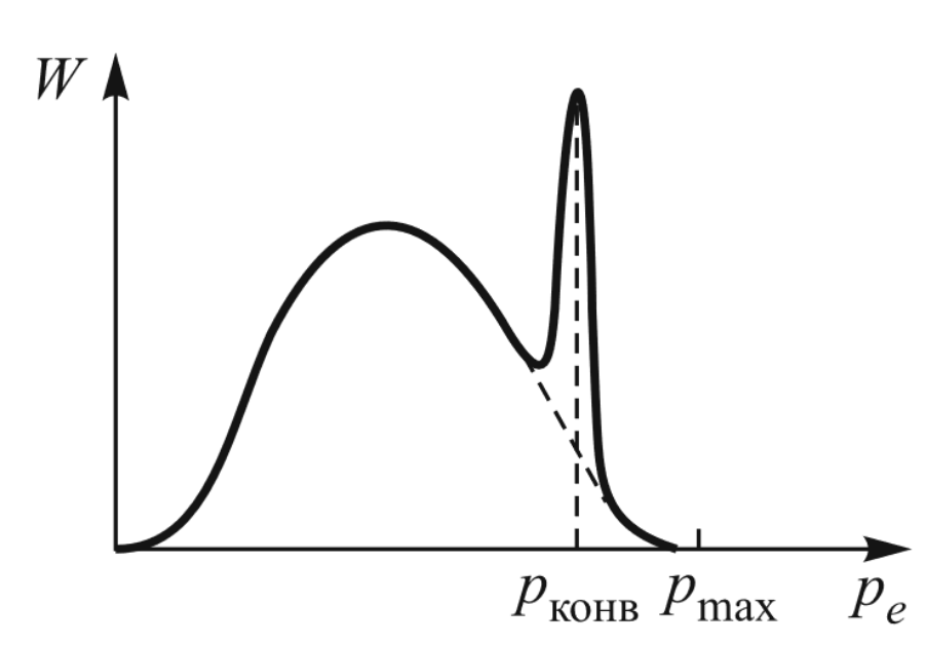

In [122]:
Image(filename='./pic.png', width=400) 

### Экспериментальная установка:

Электроны, испускаемые радиоактивным источником, попадают в магнитное поле катушки, ось которой параллельна оси $Oz$. Траектории электронов в магнитном поле представляют собой сложные спирали, сходящиеся за катушкой в фокусе, расположенном на оси $Oz$. В фокусе установлен детектор электронов. 

Как показывает расчёт, для заряженных частиц тонкая катушка эквивалентна линзе. Её фокусное расстояние расстояние зависит от импульса электронов $p_e$ и силы тока, протекающего через катушку (и создающего магнитное поле) следующим образом:

\begin{equation}
			\frac{1}{f} \simeq \frac{I^2}{p_e^2}
		\end{equation}

При заданной силе тока на входное окно счетчика фокусируются электроны с определенным  импульсом. Электроны, которые обладают другими значениями импульса, не сфокусированы и проходят мимо окна. Импульс сфокусированных электронов пропорционален величине тока:

\begin{equation}
p_e = kI
\end{equation}



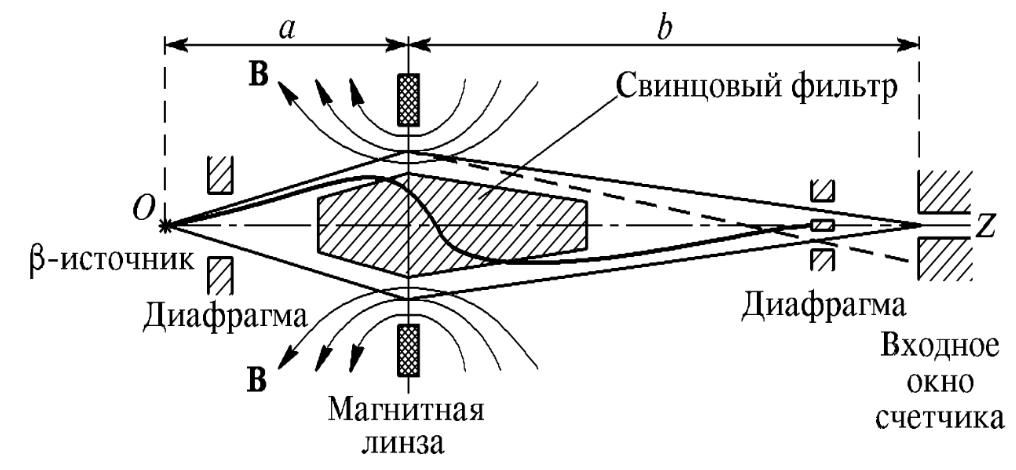

In [161]:
Image(filename='./scheme.png', width=400) 

### Ход эксперимента:

Снимем точки $\beta$-спектра. Фоновое излучение равно $N_b = 0.775$ 1/s. C учетом этого пересчитаем число частиц, зарегистрированных счетчиком.
    

In [162]:
N_bg = 0.775 

Считаем данные:

In [163]:
data = pd.read_csv('./data/data.csv') 

In [164]:
data['$N-N_b, 1/s$'] = data['$N$'] - N_bg



In [165]:
I, N = data['$I; A$'], data['$N$']
k = I.argsort() 
I, N = I[k], N[k] 


Построим график $(N-N_{bg}) (I)$ и произведем интерполяцию для последующего поиска максимумов:

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ErrorbarContainer object of 3 artists>

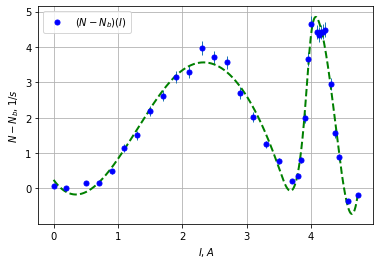

In [257]:
spl = UnivariateSpline(I, N-N_bg)
spl.set_smoothing_factor(1.95)

 
xs = np.linspace(0, np.max(I), 1000)
plt.plot(xs, spl(xs), 'g--', lw=2)
plt.grid()
plt.plot(I, N-N_bg, 'bo', ms=5, label='$(N-N_b)(I)$')
 
plt.xlabel('$I, A$')
plt.ylabel('$N-N_b, 1/s$')
plt.legend()



yerr = np.sqrt(N-N_bg) / 10 
plt.errorbar(I, N-N_bg, yerr=yerr, fmt='none',elinewidth=1) 


Найдем $I_{conv}$:

In [207]:
I_conv = sp.optimize.fmin(lambda I: -spl(I), 4)  
I_conv


Optimization terminated successfully.
         Current function value: -4.849566
         Iterations: 12
         Function evaluations: 24


array([4.07421875])

Найдем импульс, энергию и рассчитаем значение величины $\frac{\sqrt{N-N_{bg}}}{p}$. Полученные значения занесем в таблицу. 

\begin{equation}\label{eq:}
k I_{conv} c = 1013.5 keV
\end{equation}

\begin{equation}
p = kI
\end{equation}



\begin{equation}
E = c \sqrt{p^2+m^2c^2} - m c^2
\end{equation}


In [220]:
kc = 1013.5 / I_conv
E = (kc**2 *I**2 +mc2**2)**0.5-mc2

sqrt_N_p = (N-N_bg)**0.5/(I*kc)

p = kc * I 

In [222]:
data['$p, kEV/s$'] = p 
data['$E, kEV$'] = E 
data['$\sqrt{N}/p$'] = np.sqrt(N-N_bg) / p 

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [223]:
data

,$I; A$,$N$,"$N-N_b, 1/s$","$p, kEV/s$","$E, kEV$",$\sqrt{N}/p$
0,0.00,0.850,0.075,0.000000,0.000000,inf
1,0.20,0.780,0.005,49.751870,2.416258,0.001421
2,0.50,0.940,0.165,124.379674,14.919513,0.003266
3,0.70,0.940,0.165,174.131544,28.854476,0.002333
4,0.90,1.260,0.485,223.883413,46.893253,0.003111
5,1.10,1.919,1.144,273.635283,68.652838,0.003909
6,1.30,2.279,1.504,323.387152,93.731715,0.003792
7,1.50,2.969,2.194,373.139022,121.735320,0.003970
8,1.70,3.399,2.624,422.890892,152.293318,0.003830
9,1.90,3.929,3.154,472.642761,185.069370,0.003757


In [237]:
def f(x, k, b):
    return k * x + b

x = E[10:18]
y = data['$\sqrt{N}/p$'][10:18]

popt, pcov = sp.optimize.curve_fit(f, x, y)
perr = np.sqrt(np.diag(pcov))
sigma_k, sigma_b = perr
k, b = popt


Text(0, 0.5, '$\\sqrt{N} / p$')

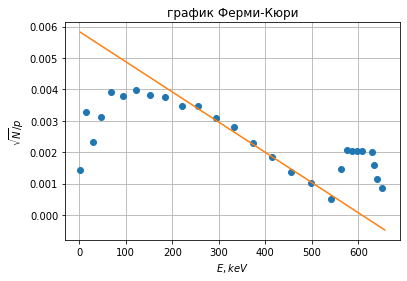

In [250]:
x = E[1:-5] 
y = data['$\sqrt{N}/p$'][1:-5]



plt.plot(x, y, 'o')
xs = np.linspace(np.min(x), np.max(x), 100)

plt.plot(xs, f(xs, k, b))
plt.grid()
plt.title('график Ферми-Кюри')
plt.xlabel('$E, keV$')
plt.ylabel('$\sqrt{N} / p$')

По пересечению с осью абсцисс найдем максимальную энергию $E_e$ электронов в $\beta$-спектре:

\begin{equation}
\frac{\sqrt{N(p)}}{p} \approx E_e - E
\end{equation}


In [239]:
-b/k 

606.8973706740013

In [258]:
b/k * (sigma_b/b + sigma_k/k)

13.572413492770018

\begin{equation}
E_e \approx (610\pm 10) keV
\end{equation}
